# Stock Price using LSTM And Its Implementation

##  Introduction

Long short term memory (LSTM) is a model that increases the memory of recurrent neural networks. Recurrent neural networks hold short term memory in that they allow earlier determining information to be employed in the current neural networks. For immediate tasks, the earlier data is used. We may not possess a list of all of the earlier information for the neural node. In RNNs, LSTMs are very widely used in Neural networks. Their effectiveness should be implemented to multiple sequence modelling problems in many application domains like video, NLP, geospatial, and time-series.
 
One of the main issues with RNN is the vanishing gradient problem, and it emerges due to the repeated use of the same parameters, in RNN blocks, at each step. We must try to use different parameters to overcome this problem at each time step

### Reading data:

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

uploaded=files.upload()


Saving GOOG.csv.xls to GOOG.csv (1).xls


### About this Dataset

https://www.kaggle.com/code/amarsharma768/stock-price-prediction-using-lstm/data

Context
All of the practitioners, learners in DL learning will surely come across RNN and LSTM's. So I thought let me add a dataset that can be used as a stepping stone into the Stock predictions.
Content
This dataset contains 14 columns and 1257 Rows. Each columns are assigned to a attribute and rows contains the values for that attribute.
The 14 columns are:

1. symbol : - Name of the company (in this case Google).
2.date :- year and date
3.close:- closing of stock value
4.high:- highest value of stock at that day
5.low:- lowest value of stock at that day
6.open:- opening value of stock at that day
7.volume
8.adjClose
9.adjHigh
10.adjLow
11.adjOpen
12.adjVolume
13.divCash
14.splitFactor

In [16]:
gstock_data = pd.read_csv('GOOG.csv.xls')
gstock_data .head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [17]:
gstock_data.shape

(1258, 14)

In [18]:
gstock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


### Exploring Dataset:

The dataset contains 14 columns associated with time series like the date and the different variables like close, high, low and volume. We will use opening and closing values for our experimentation of time series with LSTM.

In [19]:
gstock_data = gstock_data[['date','open','close']] # Extracting required columns

gstock_data['date'] = pd.to_datetime(gstock_data['date'].apply(lambda x: x.split()[0])) # Selecting only date

gstock_data.set_index('date',drop=True,inplace=True) # Setting date column as index

gstock_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,open,close
date,,
2016-06-14,716.48,718.27
2016-06-15,719.00,718.92
2016-06-16,714.91,710.36
2016-06-17,708.65,691.72
2016-06-20,698.77,693.71


We have performed a few feature extraction here. We take the dates alone from the overall date variable. Now we can be using matplotlib to visualize the available data and see how our price values in data are being displayed. The green colour was used to visualize the open variable for the price-date graph, and for the closing variable, we used red colour.

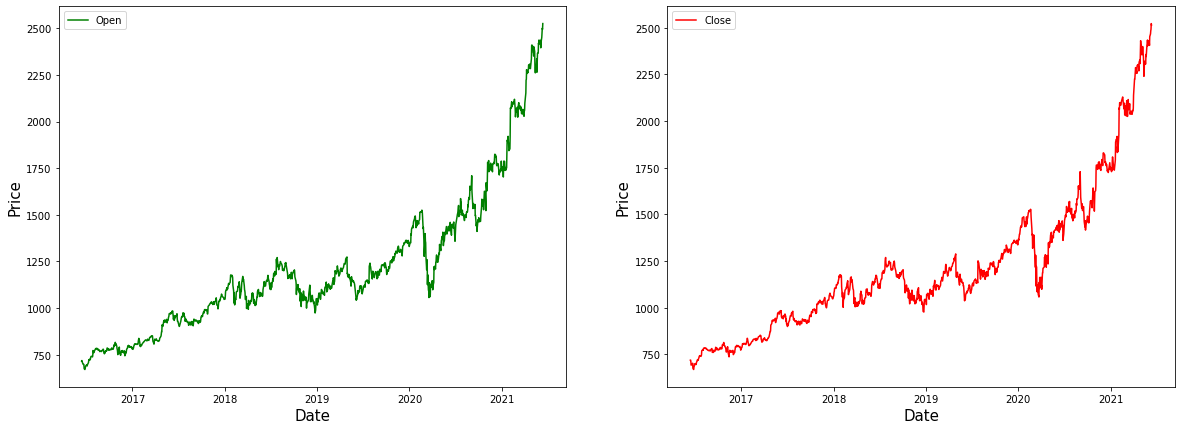

In [20]:
fg, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(gstock_data['open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(gstock_data['close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fg.show()


### Data Pre-processing:

We must pre-process this data before applying stock price using LSTM. Transform the values in our data with help of the fit_transform function. Min-max scaler is used for scaling the data so that we can bring all the price values to a common scale. We then use 80 % data for training and the rest 20% for testing and assign them to separate variables.

In [21]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
gstock_data[gstock_data.columns] = MMS.fit_transform(gstock_data)

In [22]:
gstock_data.shape

(1258, 2)

In [23]:
training_size = round(len(gstock_data) * 0.80) # Selecting 80 % for training and 20 % for testing
training_size

1006

In [24]:
train_data = gstock_data[:training_size]
test_data  = gstock_data[training_size:]

train_data.shape, test_data.shape

((1006, 2), (252, 2))

### splitting data for training:

A function is created so that we can create the sequence for training and testing.

In [25]:
# Function to create sequence of data for training and testing

def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))
  

In [26]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)

In [27]:
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((956, 50, 2), (956, 2), (202, 50, 2), (202, 2))

### Implementation of our LSTM model:

In the next step, we create our LSTM model.  In this article, we will use the Sequential model imported from Keras and required libraries are imported.

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

We use two LSTM layers in our model and implement drop out in between for regularization. The number of units assigned in the LSTM parameter is fifty. with a dropout of 10 %. Mean squared error is the loss function for optimizing the problem with adam optimizer. Mean absolute error is the metric used in our LSTM network as it is associated with time-series data

In [29]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1)) 
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10600     
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 30,902
Trainable params: 30,902
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(train_seq, train_label, epochs=80,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/80
30/30 [==============================] - 7s 84ms/step - loss: 0.0091 - mean_absolute_error: 0.0654 - val_loss: 0.0111 - val_mean_absolute_error: 0.0852
Epoch 2/80
30/30 [==============================] - 1s 49ms/step - loss: 9.9962e-04 - mean_absolute_error: 0.0251 - val_loss: 0.0069 - val_mean_absolute_error: 0.0697
Epoch 3/80
30/30 [==============================] - 1s 50ms/step - loss: 5.3630e-04 - mean_absolute_error: 0.0167 - val_loss: 0.0021 - val_mean_absolute_error: 0.0369
Epoch 4/80
30/30 [==============================] - 1s 49ms/step - loss: 5.2073e-04 - mean_absolute_error: 0.0162 - val_loss: 0.0049 - val_mean_absolute_error: 0.0578
Epoch 5/80
30/30 [==============================] - 1s 48ms/step - loss: 5.2357e-04 - mean_absolute_error: 0.0166 - val_loss: 0.0037 - val_mean_absolute_error: 0.0485
Epoch 6/80
30/30 [==============================] - 1s 49ms/step - loss: 4.8995e-04 - mean_absolute_error: 0.0160 - val_loss: 0.0036 - val_mean_absolute_error: 0.0477
Ep

In [31]:
test_predicted = model.predict(test_seq)
test_predicted[:5]

array([[0.4758583 , 0.48138592],
       [0.48323312, 0.4883367 ],
       [0.48755914, 0.4923422 ],
       [0.4999886 , 0.50425816],
       [0.51135695, 0.5148865 ]], dtype=float32)

In [32]:
test_inverse_predicted = MMS.inverse_transform(test_predicted) # Inversing scaling on predicted data
test_inverse_predicted[:5]

array([[1553.2031, 1560.4318],
       [1566.8755, 1573.314 ],
       [1574.8956, 1580.7375],
       [1597.9388, 1602.8219],
       [1619.0149, 1622.5198]], dtype=float32)

### Visualization:

After fitting the data with our model we use it for prediction. We must use inverse transformation to get back the original value with the transformed function. Now we can use this data to visualize the prediction

In [35]:
## Visualizing predicted and actual data

# Merging actual and predicted data for better visualization

gs_slic_data = pd.concat([gstock_data.iloc[-202:].copy(),pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],index=gstock_data.iloc[-202:].index)], axis=1)


In [36]:
gs_slic_data[['open','close']] = MMS.inverse_transform(gs_slic_data[['open','close']]) # Inverse scaling

In [37]:
gs_slic_data.head()

,open,close,open_predicted,close_predicted
date,,,,
2020-08-24,1593.98,1588.20,1553.203125,1560.431763
2020-08-25,1582.07,1608.22,1566.875488,1573.313965
2020-08-26,1608.00,1652.38,1574.895630,1580.737549
2020-08-27,1653.68,1634.33,1597.938843,1602.821899
2020-08-28,1633.49,1644.41,1619.014893,1622.519775


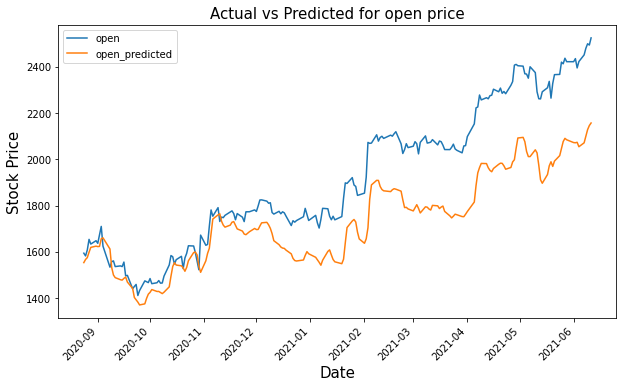

In [38]:
gs_slic_data[['open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

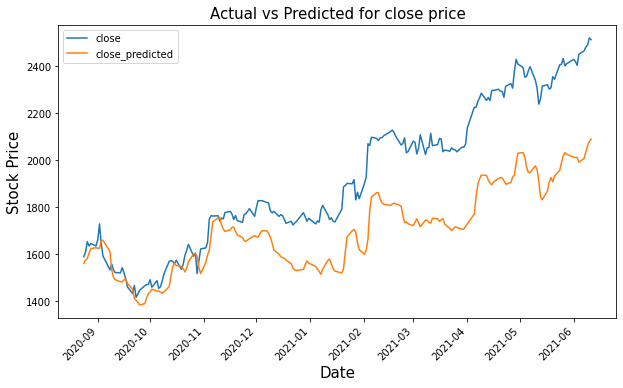

In [39]:
gs_slic_data[['close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

### Conclusion 
we explored LSTM and stock price using LSTM. We then visualized the opening and closing price value after using LSTM.

### Predicting upcoming 10 days

In [40]:
# Creating a dataframe and adding 10 days to existing index 

gs_slic_data = gs_slic_data.append(pd.DataFrame(columns=gs_slic_data.columns,index=pd.date_range(start=gs_slic_data.index[-1], periods=11, freq='D', closed='right')))

In [41]:
gs_slic_data['2021-06-09	':'2021-06-16']

,open,close,open_predicted,close_predicted
2021-06-09,2499.50,2491.40,2128.204346,2062.398438
2021-06-10,2494.01,2521.60,2145.885010,2079.302734
2021-06-11,2524.92,2513.93,2156.927490,2089.822754
2021-06-12,NaN,NaN,NaN,NaN
2021-06-13,NaN,NaN,NaN,NaN
2021-06-14,NaN,NaN,NaN,NaN
2021-06-15,NaN,NaN,NaN,NaN
2021-06-16,NaN,NaN,NaN,NaN


In [42]:
upcoming_prediction = pd.DataFrame(columns=['open','close'],index=gs_slic_data.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [43]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  upcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)

In [44]:
upcoming_prediction[['open','close']] = MMS.inverse_transform(upcoming_prediction[['open','close']])

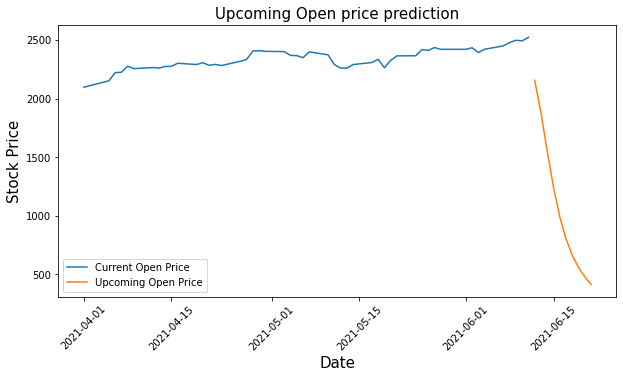

In [45]:
fg,ax=plt.subplots(figsize=(10,5))
ax.plot(gs_slic_data.loc['2021-04-01':,'open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Open price prediction',size=15)
ax.legend()
fg.show()

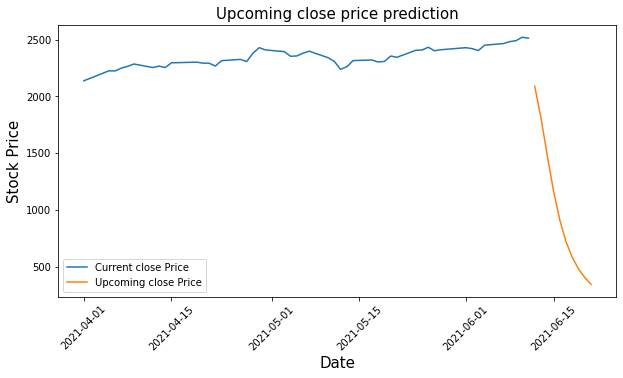

In [46]:
fg,ax=plt.subplots(figsize=(10,5))
ax.plot(gs_slic_data.loc['2021-04-01':,'close'],label='Current close Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming close price prediction',size=15)
ax.legend()
fg.show()



---


# *Thank You...!* 


---

